In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd



In [ ]:
wine = load_wine()

# Create DataFrame
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# Add target column
wine_df['target'] = wine.target

# Show first few rows
wine_df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
wine_df.shape

(178, 14)

In [ ]:
wine_df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [ ]:
X = wine_df.drop(columns=['target'] , axis=1)
y = wine_df['target']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1, random_state=42)



In [ ]:
X_test.shape

(18, 13)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
X_train.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,12.998375,2.323562,2.359125,19.430625,100.03125,2.298125,2.024687,0.365500,1.606125,5.110062,0.957788,2.598562,744.512500
std,0.809576,1.126012,0.274066,3.426332,14.30768,0.636180,1.011282,0.127555,0.578981,2.350731,0.231160,0.717039,315.628035
min,11.030000,0.890000,1.360000,10.600000,70.00000,0.980000,0.340000,0.130000,0.410000,1.740000,0.480000,1.270000,278.000000
25%,12.355000,1.607500,2.210000,17.000000,88.00000,1.735000,1.097500,0.260000,1.250000,3.240000,0.787500,1.852500,498.750000
50%,13.050000,1.830000,2.355000,19.050000,98.00000,2.335000,2.135000,0.340000,1.560000,4.750000,0.980000,2.780000,666.000000
75%,13.695000,3.000000,2.532500,21.500000,107.00000,2.800000,2.865000,0.455000,1.962500,6.262500,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.00000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
knn_without_pca = KNeighborsClassifier(n_neighbors=3)


In [ ]:
knn_without_pca.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn_without_pca.predict(X_test_scaled)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.9444444444444444


Text(50.722222222222214, 0.5, 'Actual')

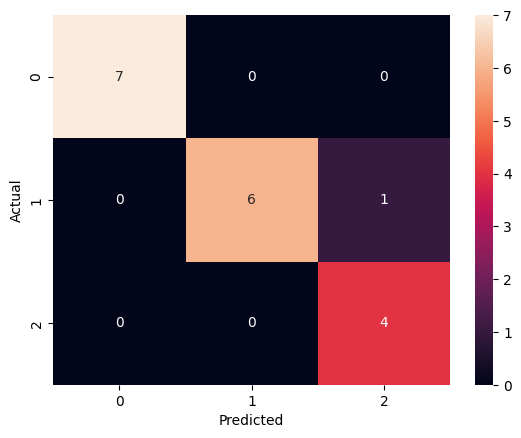

In [ ]:
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.86      0.92         7
           2       0.80      1.00      0.89         4

    accuracy                           0.94        18
   macro avg       0.93      0.95      0.94        18
weighted avg       0.96      0.94      0.95        18



**With PCA**

In [ ]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn_with_pca = KNeighborsClassifier(n_neighbors=3)
knn_with_pca.fit(X_train_pca, y_train)

y_pred_pca = knn_with_pca.predict(X_test_pca)
print("Accuracy with PCA:", accuracy_score(y_test, y_pred_pca))


Accuracy with PCA: 1.0


In [ ]:
import seaborn as sns

Text(50.722222222222214, 0.5, 'Actual')

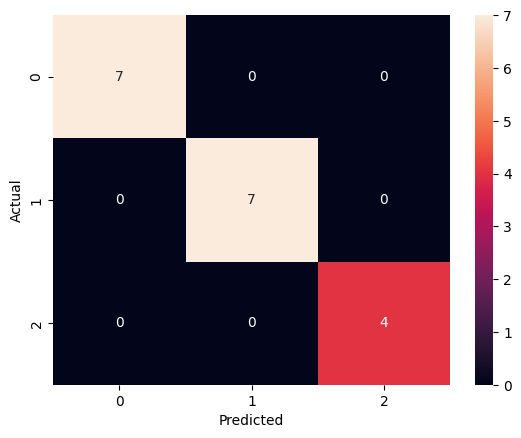

In [ ]:
cm = confusion_matrix(y_test,y_pred_pca)

sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
print(classification_report(y_test,y_pred_pca))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.86      0.92         7
           2       0.80      1.00      0.89         4

    accuracy                           0.94        18
   macro avg       0.93      0.95      0.94        18
weighted avg       0.96      0.94      0.95        18



In [ ]:
for i in range(1,13):
  pca = PCA(n_components=i)
  X_train1 = pca.fit_transform(X_train_scaled)
  X_test1 = pca.transform(X_test_scaled)

  knn_with_pca = KNeighborsClassifier(n_neighbors=3)
  knn_with_pca.fit(X_train1, y_train)

  y_pred_pca = knn_with_pca.predict(X_test1)
  print(f"Accuracy with number of components {i}:", accuracy_score(y_test, y_pred_pca))


Accuracy with number of components 1: 0.7222222222222222
Accuracy with number of components 2: 1.0
Accuracy with number of components 3: 1.0
Accuracy with number of components 4: 0.9444444444444444
Accuracy with number of components 5: 0.9444444444444444
Accuracy with number of components 6: 0.9444444444444444
Accuracy with number of components 7: 0.9444444444444444
Accuracy with number of components 8: 0.9444444444444444
Accuracy with number of components 9: 0.9444444444444444
Accuracy with number of components 10: 0.9444444444444444
Accuracy with number of components 11: 0.9444444444444444
Accuracy with number of components 12: 0.9444444444444444
